In [34]:
import open3d as o3d
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [35]:
A={"_frame": "realsense_ee", "_fx": 380.63585606, "_fy": 178.29374297, "_cx": 461.90861297, "_cy": 198.17118965, "_skew": 0.0, "_height": 480, "_width": 848, "_K": 0.0}
A3={"_frame": "realsense_ee", "_fx": 649.57096178, "_fy": 663.00061084, "_cx": 457.11976234, "_cy": 152.29157712, "_skew": 0.0, "_height": 480, "_width": 640, "_K": 0.0}
A4={"_frame": "realsense_ee", "_fx": 737.82463021, "_fy": 785.90132524, "_cx": 427.86304115, "_cy": 254.95965558, "_skew": 0.0, "_height": 480, "_width": 640, "_K": 0.0}
A5={"_frame": "realsense_ee", "_fx": 575.93878528, "_fy": 508.58394168, "_cx": 416.79589781, "_cy": 226.72657613, "_skew": 0.0, "_height": 480, "_width": 640, "_K": 0.0}

In [36]:
intr2=o3d.camera.PinholeCameraIntrinsic()
intr2.set_intrinsics(848,480,380.63585606,178.29374297,461.90861297,198.17118965)
intr3=o3d.camera.PinholeCameraIntrinsic()
intr3.set_intrinsics(848,480,649.57096178,663.00061084,457.11976234,152.29157712)
intr4=o3d.camera.PinholeCameraIntrinsic()
intr4.set_intrinsics(848,480,380.63585606,178.29374297,461.90861297,198.17118965)
intr5=o3d.camera.PinholeCameraIntrinsic()
intr5.set_intrinsics(848,480,380.63585606,178.29374297,461.90861297,198.17118965)

In [40]:
color_raw = o3d.io.read_image("../outputs/Images/C2/C1.png")
depth_raw = o3d.io.read_image("../outputs/Images/C2/D1.png")

In [41]:
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw)


pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
    o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

In [42]:

o3d.io.write_point_cloud('/home/ppak/GitHub/CV-Robotics/outputs/point_c/2.pcd',pcd)

True

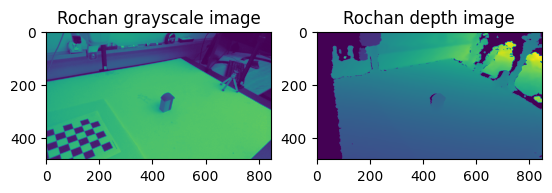

In [13]:
def plot_image(rgbd_image):
  plt.subplot(1, 2, 1)
  plt.title(' grayscale image')
  plt.imshow(rgbd_image.color)
  plt.subplot(1, 2, 2)
  plt.title(' depth image')
  plt.imshow(rgbd_image.depth)
  plt.show()

In [ ]:
extrinsic2=[[0.28814347 ,-0.40809906, -0.7181324,0],
[0.84672697 ,-0.49247687  ,0.20129575,0],
[-0.52512132 ,-0.71284136,  0.46487074,0],
[-0.08544615 ,-0.49932328, -0.8621921,1]]
extrinsic2=np.array(extrinsic2)